# IRIS CLASSIFICATION

In [116]:
import numpy as np 
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [63]:
iris=datasets.load_iris()

In [64]:
x=iris.data
x.shape

(150, 4)

In [65]:
y=iris.target

In [66]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [67]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
df=pd.DataFrame(x,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Preprocessing the Dataset

In [71]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Data Analysis

<Axes: >

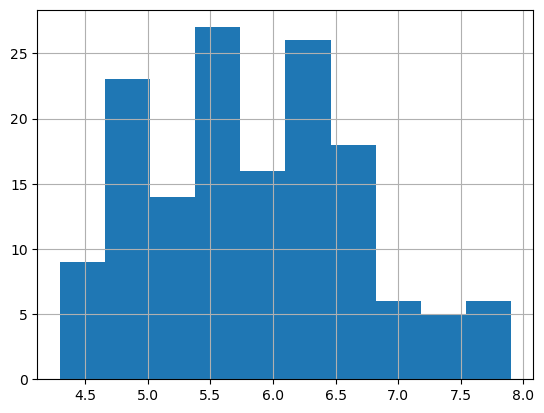

In [72]:
df['sepal length (cm)'].hist()

<Axes: >

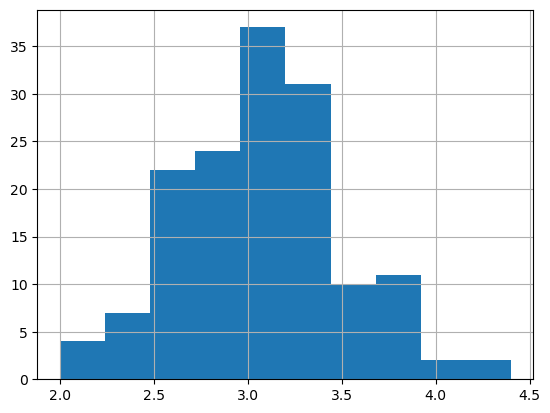

In [73]:
df['sepal width (cm)'].hist()

<Axes: >

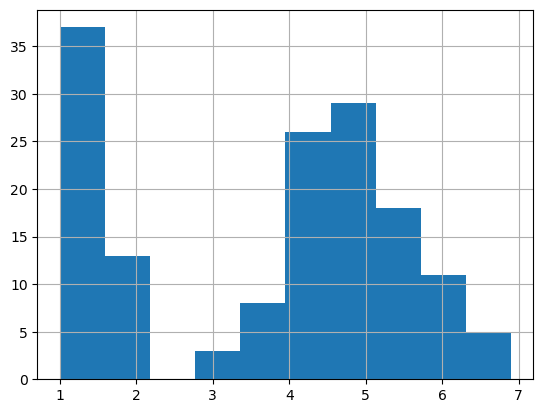

In [74]:
df['petal length (cm)'].hist()

<Axes: >

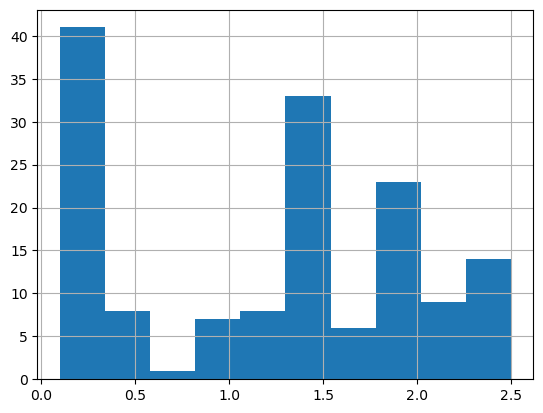

In [75]:
df['petal width (cm)'].hist()


In [76]:
colors=['blue','red','green']
species=['setosa','versicolor','virginica']

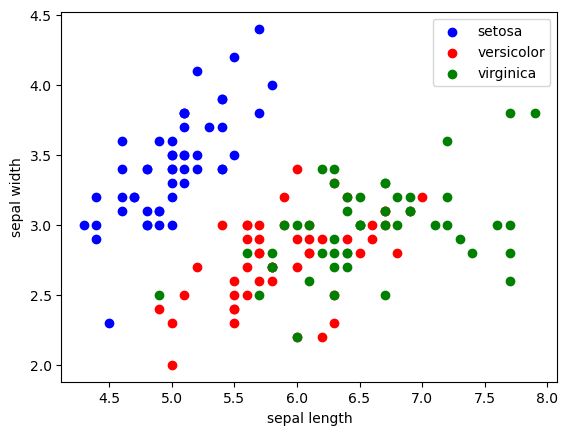

In [77]:
for i in range(3):
#   filtering data on each class
    a=df[y==i]
    
    plt.scatter(a['sepal length (cm)'],a['sepal width (cm)'],c = colors[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

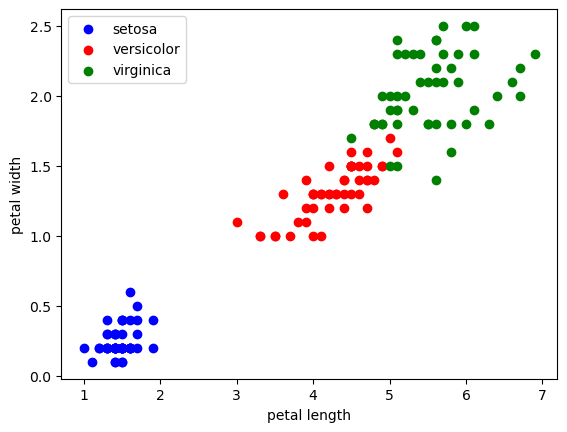

In [78]:
for i in range(3):
    b=df[y==i]
    plt.scatter(b['petal length (cm)'],b['petal width (cm)'],c =colors[i],label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

### correlation Matrix

In [79]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### heat map

<Axes: >

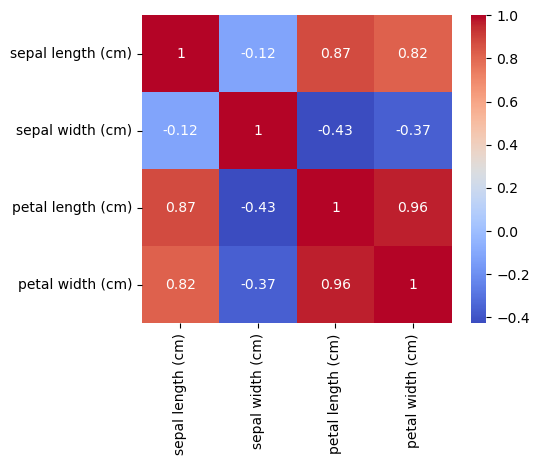

In [80]:
corr=df.corr()
# plot the heat map
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

### model training and testing

In [92]:
# input data
x=df
# output data
y
# splitting the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)


## Model Training

In [103]:
# taking logistic regression as classifier
model1 =LogisticRegression()
model1.fit(x_train,y_train)


LogisticRegression()

In [119]:

print('logistic Regression Accuracy :', model1.score(x_test,y_test)*100)

logistic Regression Accuracy : 97.77777777777777


In [105]:
# taking KNN as classifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)


KNeighborsClassifier()

In [106]:
print('K-nearest Neighbours :',model2.score(x_test,y_test)*100)

K-nearest Neighbours : 97.77777777777777


In [107]:
# taking DecisionTree Classifier
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)


DecisionTreeClassifier()

In [108]:
print("Decision Tree Accuracy :",model3.score(x_test,y_test)*100)

Decision Tree Accuracy : 97.77777777777777


In [115]:
# all models are performing equally on the testing data
# so we can choose any one of them as our classifier model for this IRIS classification


In [132]:
# let's make some predictions
prediction=model1.predict(x_test)
for i in prediction:
    if i==0:
        print('setosa')
    elif i==1:
        print('versicolor')
    else :
        print('virginica')

    


virginica
versicolor
setosa
virginica
setosa
virginica
setosa
versicolor
versicolor
versicolor
virginica
versicolor
versicolor
versicolor
versicolor
setosa
versicolor
versicolor
setosa
setosa
virginica
versicolor
setosa
setosa
virginica
setosa
setosa
versicolor
versicolor
setosa
virginica
versicolor
setosa
virginica
virginica
versicolor
setosa
virginica
versicolor
versicolor
virginica
setosa
virginica
setosa
setosa
